Summary: Occurences of differences were observed for different ranges of feature LSTAT, which is mainly responsible for the differences.
- For values up to 6.3, A may predict 1 while B predicts 2,
- for values up to 9.5, A may predict 2 while B predicts 1,
- for values from 9.5 upwards, A may predict 0 while B predicts 1.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from baseline import dt_feature_importance, print_rules
from tasks.boston_housing import make_task3 as make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()
comparer = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


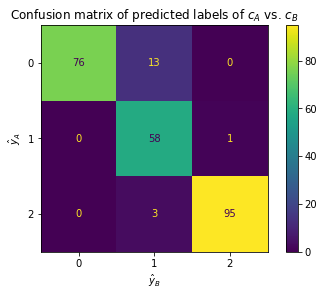

In [3]:
comparer.plot_confusion_matrix(X)

In [4]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)

In [14]:
mclass_tree = DecisionTreeClassifier(max_depth=5)
mclass_tree.fit(X, mclass_diff)
class_names = comparer.class_names[mclass_tree.classes_]

In [15]:
feature_importances = dt_feature_importance(mclass_tree)
feature_order = np.flip(np.argsort(feature_importances))

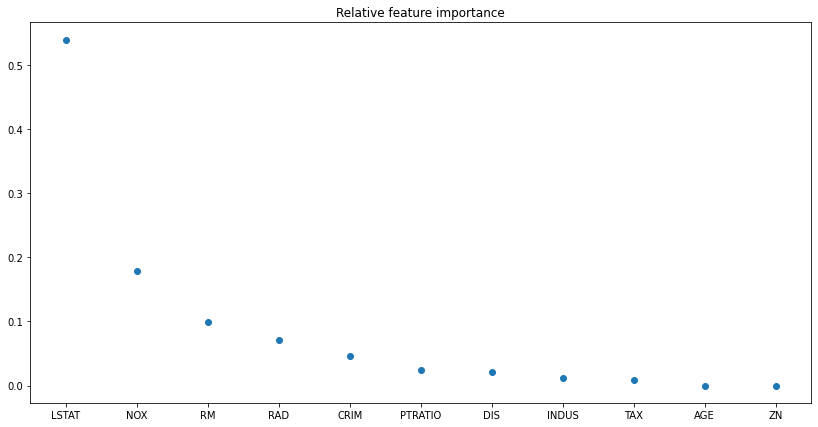

In [16]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

In [17]:
class_names

array(['(0, 0)', '(0, 1)', '(1, 1)', '(1, 2)', '(2, 1)', '(2, 2)'],
      dtype='<U6')

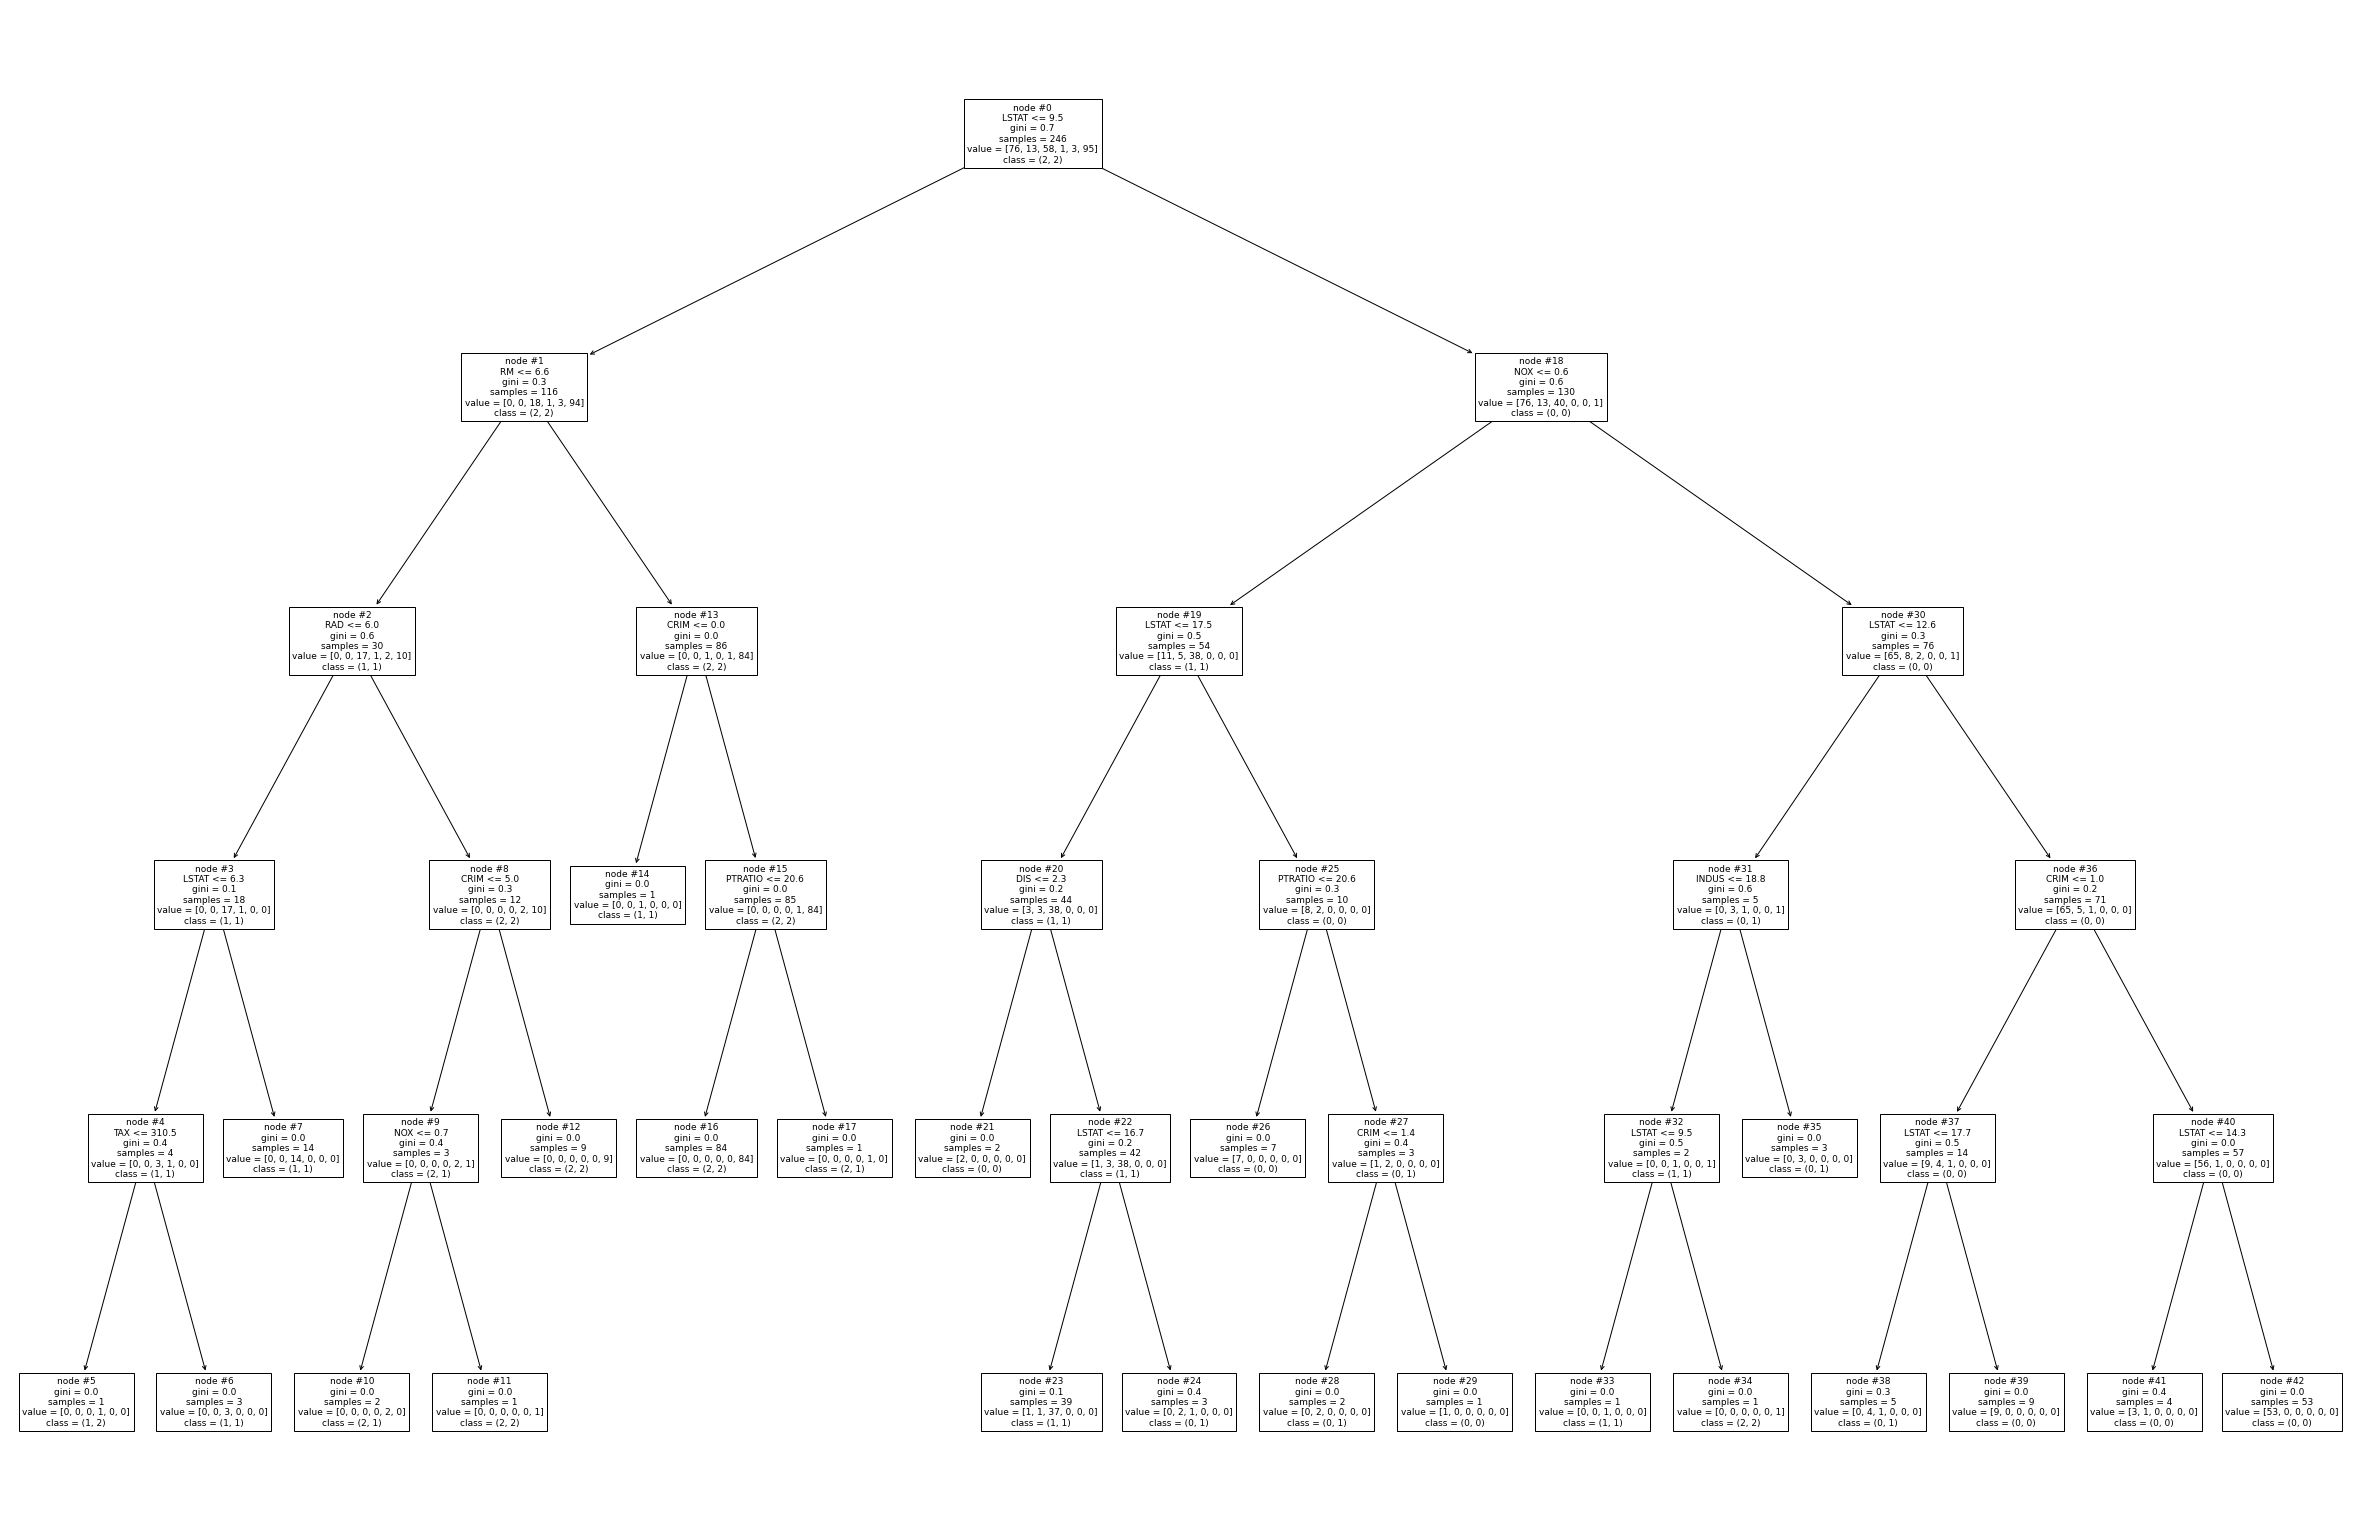

In [18]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(mclass_tree, feature_names=comparer.feature_names, class_names=class_names,
          ax=ax, precision=1, node_ids=True);

The rules cover 11 out of a total of 13 instances classified $(0,1)$.

In [19]:
print_rules(mclass_tree, feature_names, class_names, '(0, 1)', feature_order, precision=1)

node #38: if (LSTAT > 12.6) and (LSTAT <= 17.7) and (NOX > 0.6) and (CRIM <= 1.0) then class: (0, 1) (4/5 instances)
node #24: if (LSTAT > 16.7) and (LSTAT <= 17.5) and (NOX <= 0.6) and (DIS > 2.3) then class: (0, 1) (2/3 instances)
node #35: if (LSTAT > 9.5) and (LSTAT <= 12.6) and (NOX > 0.6) and (INDUS > 18.8) then class: (0, 1) (3/3 instances)
node #28: if (LSTAT > 17.5) and (NOX <= 0.6) and (CRIM <= 1.4) and (PTRATIO > 20.6) then class: (0, 1) (2/2 instances)


The rule covers all instances classified $(1,2)$.

In [20]:
print_rules(mclass_tree, feature_names, class_names, '(1, 2)', feature_order, precision=1)

node #5: if (LSTAT <= 6.3) and (RM <= 6.6) and (RAD <= 6.0) and (TAX <= 310.5) then class: (1, 2) (1/1 instances)


The rule covers all instances classified $(2,1)$.

In [21]:
print_rules(mclass_tree, feature_names, class_names, '(2, 1)', feature_order, precision=1)

node #10: if (LSTAT <= 9.5) and (NOX <= 0.7) and (RM <= 6.6) and (RAD > 6.0) and (CRIM <= 5.0) then class: (2, 1) (2/2 instances)
node #17: if (LSTAT <= 9.5) and (RM > 6.6) and (CRIM > 0.0) and (PTRATIO > 20.6) then class: (2, 1) (1/1 instances)
